# [프로젝트2] 시계열 데이터 전처리 방법 알아보기
---


## 프로젝트 목표
---
- 데이터셋 내에 존재하는 결측치를 보간법을 활용하여 대체하는 방법을 알아봅니다.
- 데이터셋 내에 존재하는 변수값의 범위를 비슷하게 만들어주는 정규화와 표준화를 진행하는 방법을 알아봅니다.


## 프로젝트 목차
---

1. **데이터 불러오기:** 전처리를 진행할 데이터셋을 불러옵니다.

2. **결측치 처리하기 (보간법):** 데이터셋 내에 존재하는 결측치 개수를 확인하고, 보간법을 활용하여 결측치를 대체하는 방법을 알아봅니다.

3. **데이터 정규화와 표준화:** 변수 값의 범위를 유사하게 만들어주기 위한 정규화와 표준화를 진행하는 방법을 알아봅니다.



## 프로젝트 개요
---

cell id `1004_0`인 데이터를 활용하여 시계열 데이터 전처리(결측치 대체, 정규화, 표준화) 방법을 알아봅니다. 


## 1. 데이터 불러오기
---

전처리를 진행할 데이터셋을 불러오고, 기초 구조를 확인합니다. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

#plt.rcParams['axes.unicode_minus']=False

In [11]:
df=pd.read_csv('./1004_0.csv')

In [9]:
df.head(5)

,New,dl_bler,ul_bler,conn_avg,conn_max,interx2in_succ_rate,interx2out_succ_rate,intraenb_succ_rate,dl_prb,ul_prb,reconfig_succ_rate
0,1004_0-20210901-0,7.551555,14.944129,27.913285,43.0,97.523220,100.000000,100.0,45.402603,59.021408,100.409763
1,1004_0-20210901-1,8.685262,11.891272,23.013333,36.0,98.170732,NaN,100.0,36.740540,21.128778,99.953052
2,1004_0-20210901-2,7.186353,12.175938,22.158977,38.0,98.039216,98.765432,100.0,28.568421,15.338933,100.249377
3,1004_0-20210901-3,6.350503,11.190096,18.396667,34.0,98.717949,100.000000,100.0,16.503713,8.009815,100.512821
4,1004_0-20210901-4,7.859695,14.823305,14.173889,28.0,97.014925,100.000000,100.0,14.133542,5.109716,99.923136


## 2. 결측치 처리하기 (보간법)
---

데이터 분석 수학 분야에서 "보간법(Interpolation)은 데이터 포인트들의 이산형 집합의 범위에 기반해서 새로운 데이터 포인트들을 만들거나 찾는 추정(estimation)의 한 유형＂입니다. 이번 시간에는 이러한 보간법을 활용하여 데이터 셋 내에 존재하는 결측치를 직접 처리해보겠습니다. 

#### 결측값 갯수

In [12]:
df.isnull().sum()

New                       0
dl_bler                  95
ul_bler                  96
conn_avg                109
conn_max                109
interx2in_succ_rate      86
interx2out_succ_rate    131
intraenb_succ_rate      116
dl_prb                  114
ul_prb                  114
reconfig_succ_rate       91
dtype: int64

#### df_temp 복제

In [13]:
df_temp=df.copy()

#### 보간법 

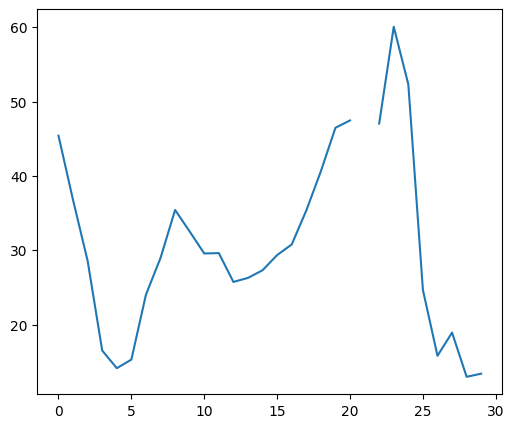

In [6]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df['dl_prb'][0:30])

plt.show()

In [14]:
dl_prb_inter=df['dl_prb'].interpolate()

In [19]:
pip install Scipy

  Obtaining dependency information for Scipy from https://files.pythonhosted.org/packages/ea/b5/29fece1a74c6a94247f8a6fb93f5b28b533338e9c34fdcc9cfe7a939a767/scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 131.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 293.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
    --------------------------------------- 0.8/38.4 MB 24.4 MB/s eta 0:00:02
   ---- ----------------------------------- 4.3/38.4 MB 55.1 MB/s eta 0:00:01
   ---- ----------------------------------- 4.4/38.4 MB 40.3 MB/s eta 0:00:01
   ---- ----------------------------------- 4.6/38.4 MB 29.6 MB/s eta 0:00:02
   ----- -------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/29/a2/d40fb2460e883eca5199c62cfc2463fd261f760556ae6290f88488c362c0/pip-25.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
   ------ --------------------------------- 0.3/1.8 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [20]:
dl_prb_inter_2=df['dl_prb'].interpolate(method='polynomial', order=2)

In [21]:
df_temp['dl_prb_2']=dl_prb_inter

In [22]:
df_temp['dl_prb_3']=dl_prb_inter_2

In [25]:
df_temp.isnull().sum()

New                       0
dl_bler                  95
ul_bler                  96
conn_avg                109
conn_max                109
interx2in_succ_rate      86
interx2out_succ_rate    131
intraenb_succ_rate      116
dl_prb                  114
ul_prb                  114
reconfig_succ_rate       91
dl_prb_2                  0
dl_prb_3                  0
dtype: int64

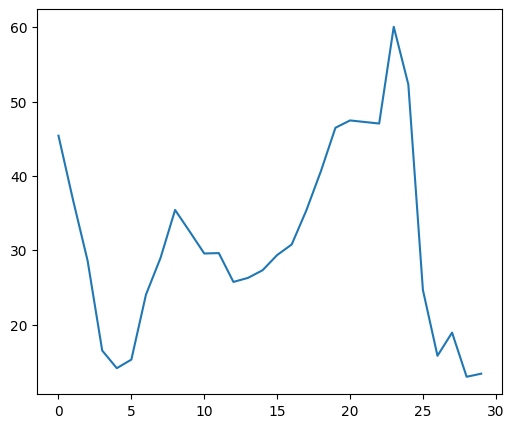

In [26]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df_temp['dl_prb_2'][0:30])

plt.show()

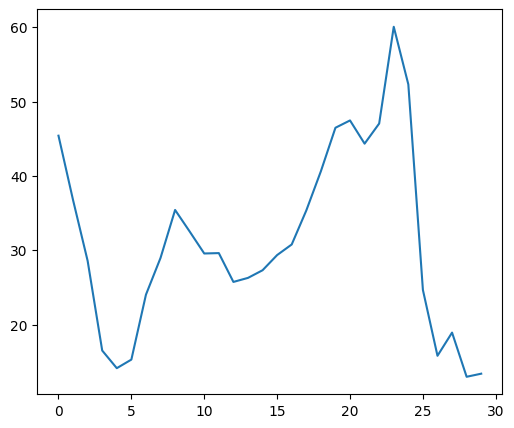

In [27]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df_temp['dl_prb_3'][0:30])

plt.show()

<Axes: >

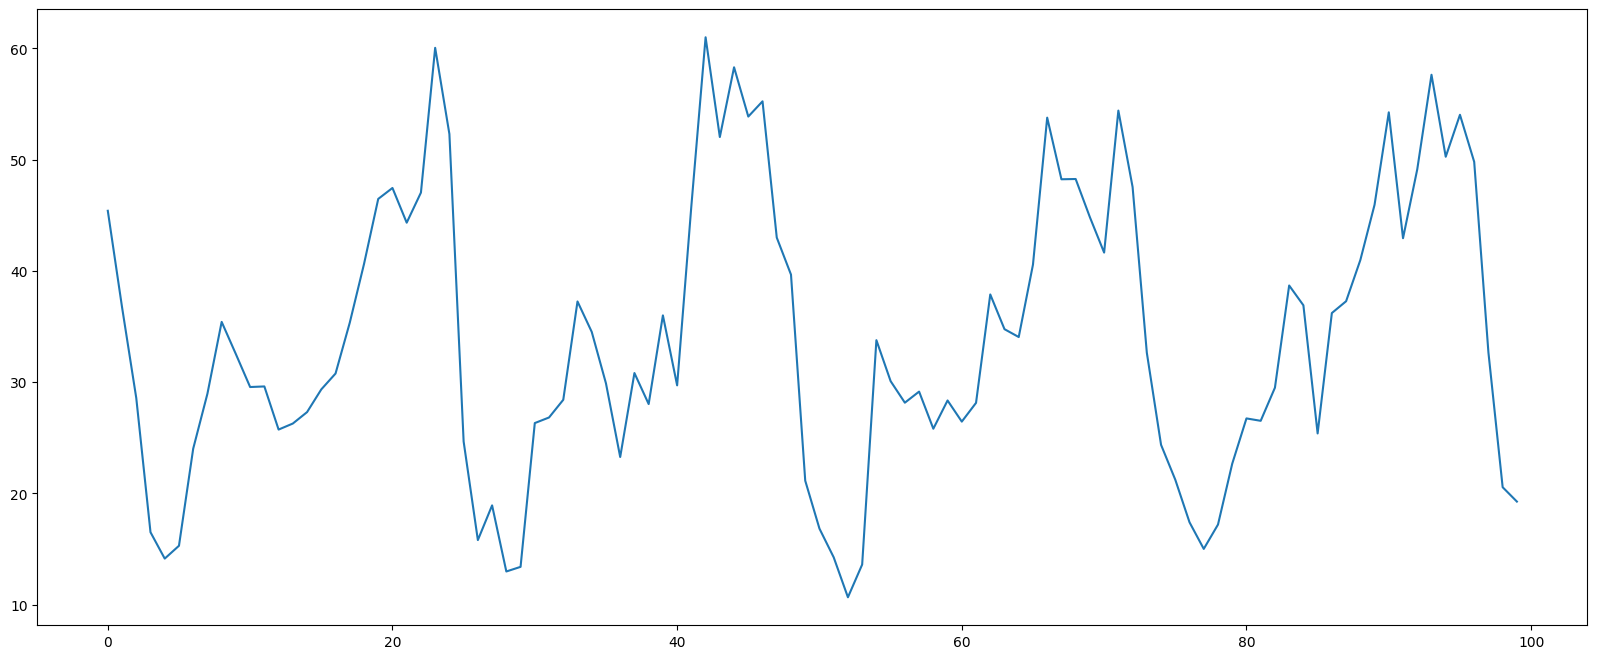

In [28]:
plt.rcParams["figure.figsize"] = (20,8)
df_temp['dl_prb_3'][0:100].plot()

### [TODO] "interx2out_succ_rate" 변수를 0번부터 30번까지 시각화 하시오.

In [ ]:
plt.figure(figsize=(6,5))
'code'

plt.show()

### [TODO] 보간법 함수(interpolate) 이용하여 "interx2out_succ_rate" 변수의 NaN 값을 채워넣으시오. 

In [ ]:
interx2out_succ_rate_inter_test= 'code'

In [ ]:
interx2out_succ_rate_inter_test.isnull().sum()

## 3. 데이터 정규화와 표준화
---

정규화와 표준화는 각각의 변수의 단위가 다르기 때문에 변수들의 값의 범위를 비슷하게 만들어주는 과정입니다. 

sklearn의 StandardScaler와 MinMaxScaler를 활용하여 데이터의 정규화와 표준화를 진행해보겠습니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df_dl_prb=df_temp['dl_prb_3'].values.reshape(-1, 1)

In [ ]:
# normalize
scaler_1 = MinMaxScaler()
df_scaled_1 = scaler_1.fit_transform(df_dl_prb)

# standardize
scaler_2 = StandardScaler()
df_scaled_2 = scaler_2.fit_transform(df_dl_prb)

In [ ]:
df_temp['dl_prb_3'].shape

In [ ]:
df_dl_prb.shape

In [ ]:
# original
plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_temp['dl_prb_3'][0:100], color='b')
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Normalize
scaler_2 = MinMaxScaler()
df_scaled_2 = scaler_2.fit_transform(df_dl_prb)

plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_scaled_2[:100], color='b')
#plt.ylim(0, 0.7)
plt.show()

In [ ]:
# standardize
scaler_1 = StandardScaler()
df_scaled_1 = scaler_1.fit_transform(df_dl_prb)

plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_scaled_1[:100], color='b')
#plt.ylim(-3, 3)
plt.show()